In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'E:\blessy\ict\car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
num_cols=['Year','Price']

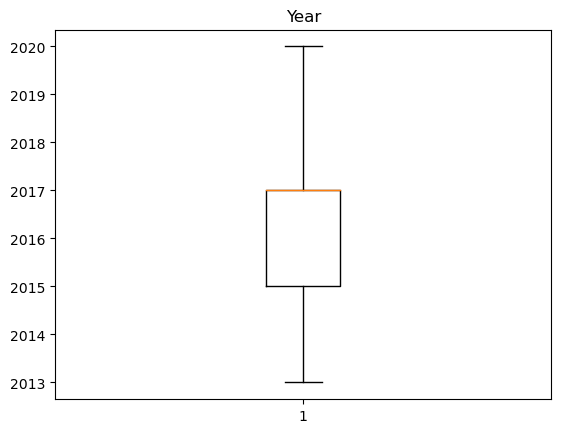

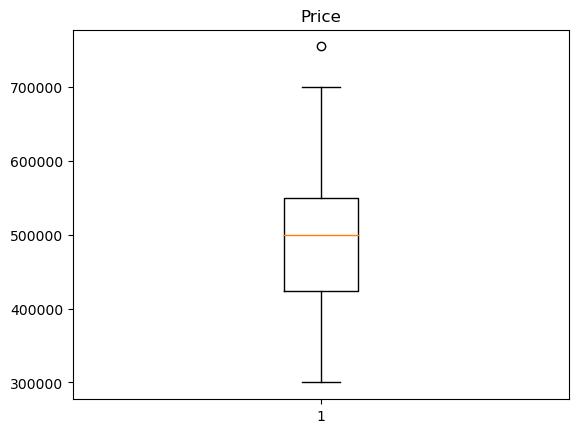

In [6]:
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [7]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [8]:
# Define the input features (X) and target variable (y)
x = data[['Year']]
y = data['Price']


In [48]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [49]:
# Create and train the linear regression model
linear_reg = LinearRegression()
lr=linear_reg.fit(x_train, y_train)
y_pred = lr.predict(x_test)
# Make predictions on the test set
linear_predictions = linear_reg.predict(x_test)

In [50]:
# Calculate MSE for linear regression
linear_mse = mean_squared_error(y_test, linear_predictions)
print("Linear Regression MSE:", linear_mse)
print(r2_score(y_test,y_pred))

Linear Regression MSE: 3515426899.6393633
0.6836162923614213


In [51]:
# Create and train the lasso regression model
lasso_reg = Lasso(alpha=0.1)  # alpha value determines the regularization strength
model=lasso_reg.fit(x_train, y_train)
y_pred = model.predict(x_test)
lasso_predictions = lasso_reg.predict(x_test)


In [52]:
# Calculate MSE for lasso regression
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso Regression MSE:", lasso_mse)
print(r2_score(y_test,y_pred))

Lasso Regression MSE: 3515428171.8917522
0.6836161778604121


Here in linear regression r2 value is slightly different than in lasso regression ,so due to this linear model is better in performance

In [53]:
# Predict the price for a 2022 model second-hand Grand i10
model_price2022=linear_reg.predict([[2022]])

C:\Users\BlessyMol\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
print('Model_price2022:',model_price2022)

Model_price2022: [709264.03304221]
